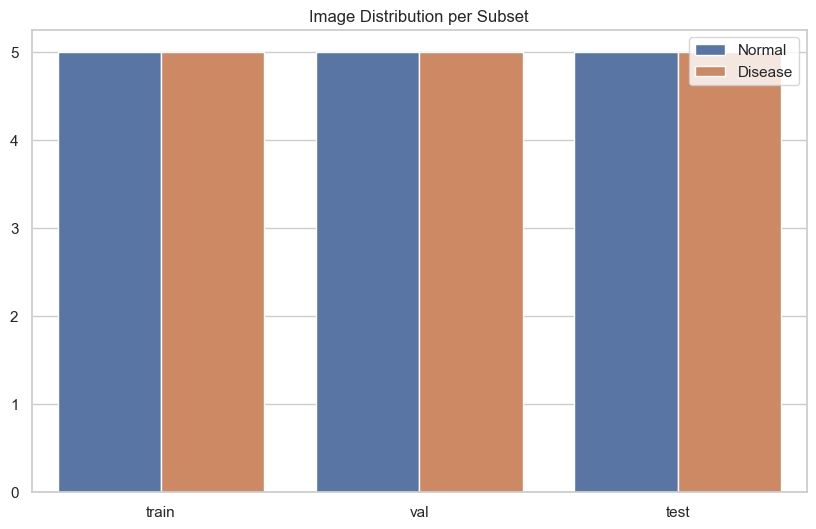

In [2]:
# Medical Image Dataset EDA & Visualization

# 📦 Imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 🧾 Dataset paths
base_dir = '../dataset'
subsets = ['train', 'val', 'test']
categories = ['Normal', 'Disease']

# 📊 1. Distribution of Images per Category
def plot_image_distribution():
    data = {}
    for subset in subsets:
        data[subset] = {}
        for category in categories:
            path = os.path.join(base_dir, subset, category)
            data[subset][category] = len(os.listdir(path))

    df_data = {
        "Subset": [],
        "Category": [],
        "Count": []
    }

    for subset in data:
        for category in data[subset]:
            df_data["Subset"].append(subset)
            df_data["Category"].append(category)
            df_data["Count"].append(data[subset][category])

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Subset", y="Count", hue="Category", data=df_data)
    plt.title("Image Distribution per Subset")
    plt.show()

plot_image_distribution()


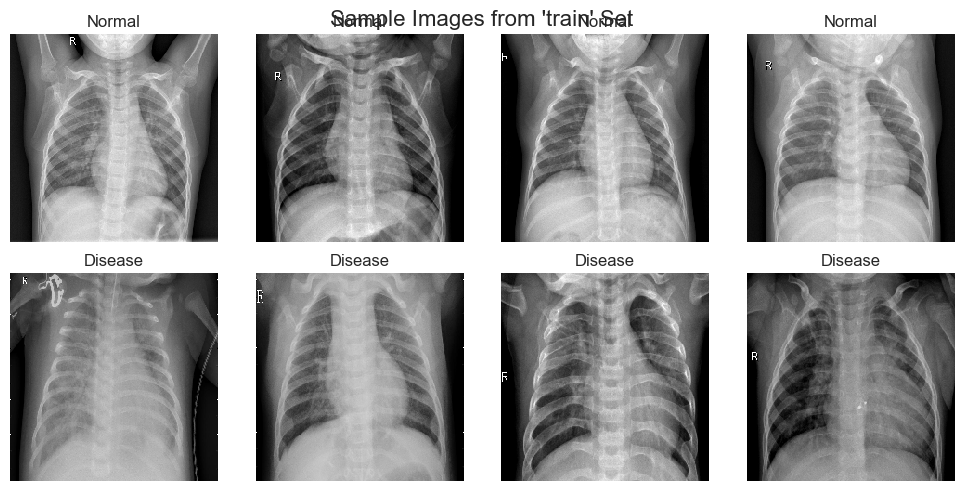

In [3]:
# 🖼️ 2. Sample Images per Class
def show_sample_images(subset='train', num_images=4):
    plt.figure(figsize=(10, 5))
    i = 1
    for category in categories:
        path = os.path.join(base_dir, subset, category)
        images = os.listdir(path)[:num_images]
        for img_name in images:
            img_path = os.path.join(path, img_name)
            img = load_img(img_path, target_size=(224, 224))
            plt.subplot(len(categories), num_images, i)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
            i += 1
    plt.suptitle(f"Sample Images from '{subset}' Set", fontsize=16)
    plt.tight_layout()
    plt.show()

show_sample_images('train')


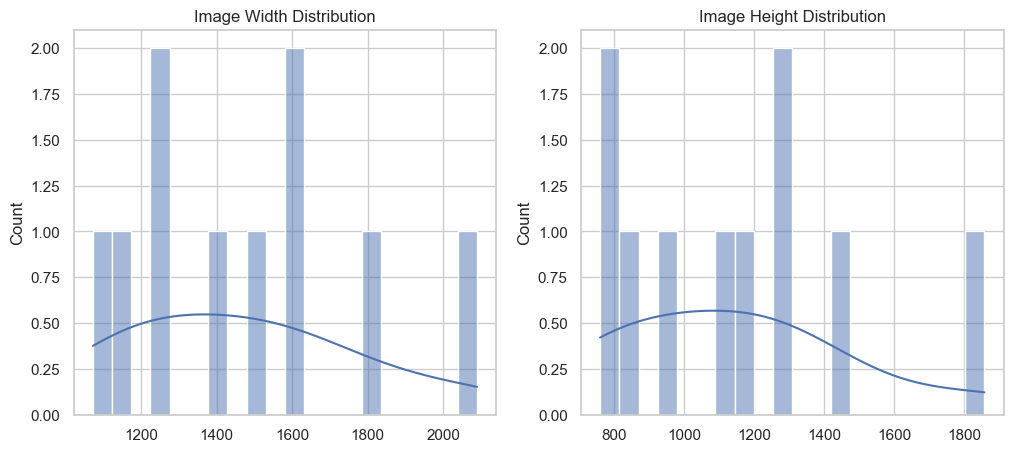

In [4]:
# 📐 3. Image Size Distribution
def plot_image_size_distribution(subset='train'):
    widths = []
    heights = []
    for category in categories:
        path = os.path.join(base_dir, subset, category)
        for file in os.listdir(path)[:100]:  # sample 100 per class
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                widths.append(w)
                heights.append(h)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(widths, bins=20, kde=True)
    plt.title("Image Width Distribution")
    plt.subplot(1, 2, 2)
    sns.histplot(heights, bins=20, kde=True)
    plt.title("Image Height Distribution")
    plt.show()

plot_image_size_distribution('train')


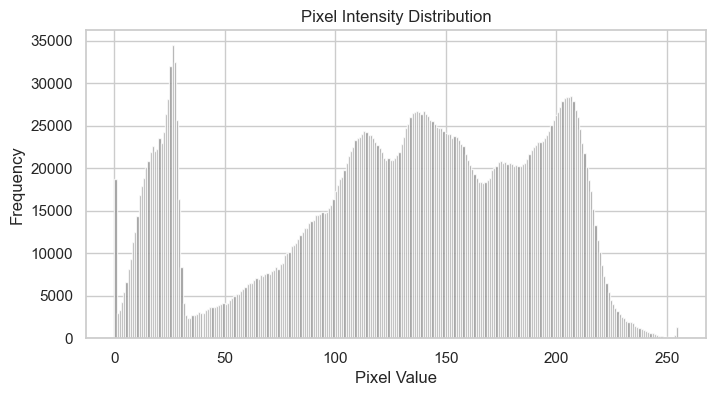

In [5]:
# 🎨 4. Pixel Intensity Histogram
def plot_pixel_distribution(subset='train'):
    path = os.path.join(base_dir, subset, 'Normal')
    sample_img_path = os.path.join(path, os.listdir(path)[0])
    img = cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.figure(figsize=(8, 4))
    plt.hist(img.ravel(), bins=256, color='gray', alpha=0.8)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

plot_pixel_distribution()
